In [1]:
import backend
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colorbar_dict = {}


# Colormap pairs
This notebook generates colormap pairs

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for two opposing vectors in the following colorspace:

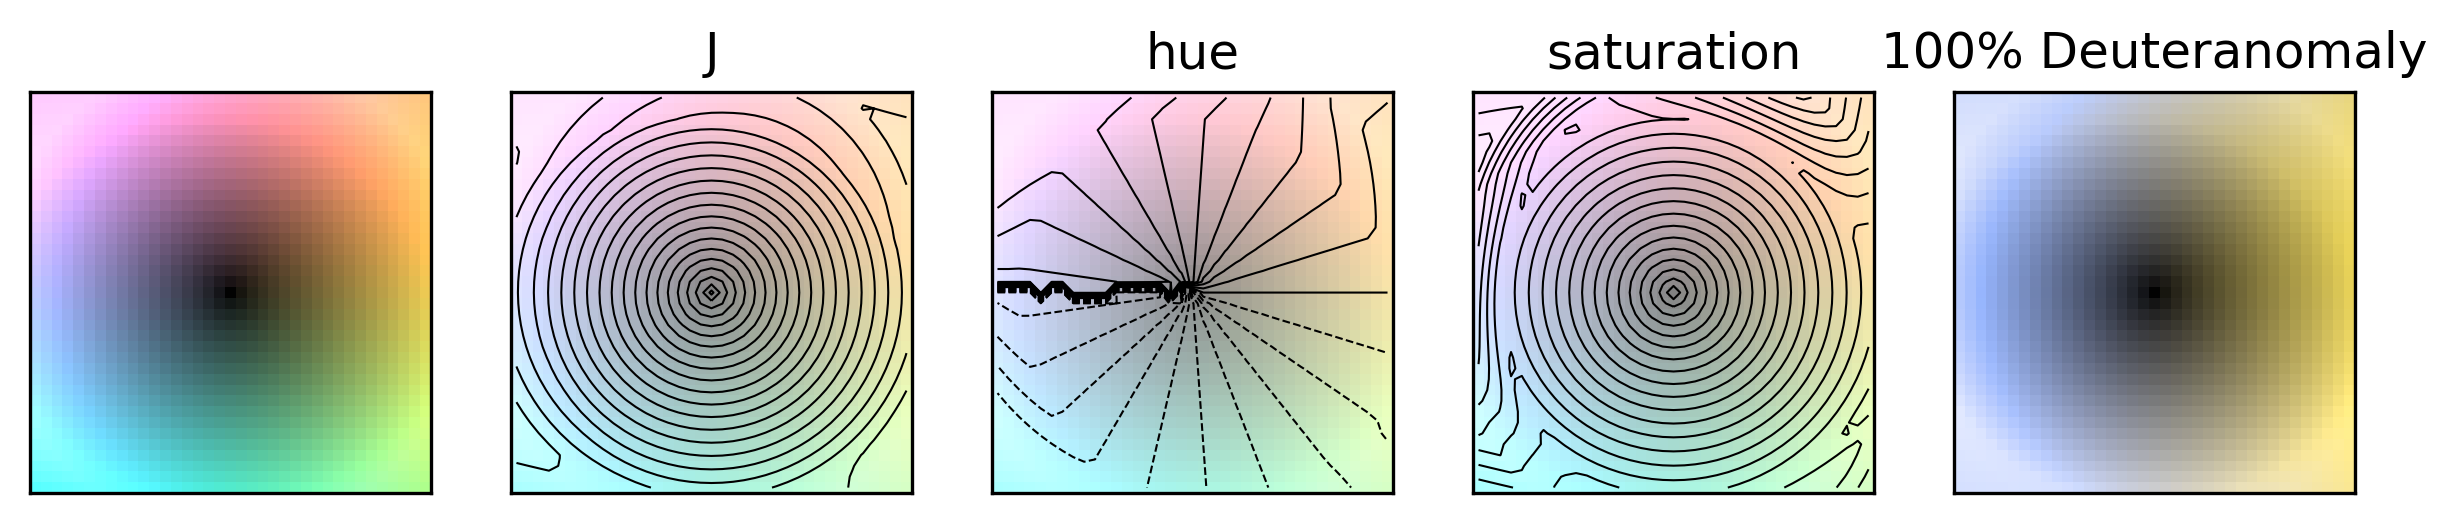

In [3]:
N2 = 37
N = 19
cmap = backend.get_var_J(l = N2, J = (110,4), gamma = 0.8, sat_gamma = 0.8)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap, axes)

We need to find two vectors at 180° in this colorspace 

Once we have selected two vectors, we need to make sure they form a greyscale (r=g=b) on the diagonal

Since the vectors are defined at 180° in ‘CAM02-LCD’ colorspace this is not guaranteed, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined)

We then extract the final colormaps from the 2D matrix


# Colorbars 2VarAddA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.949285   1.01199211 0.93024259]
values <0: 0
values >1: 0


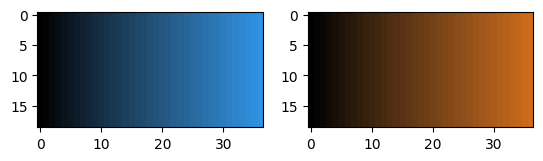

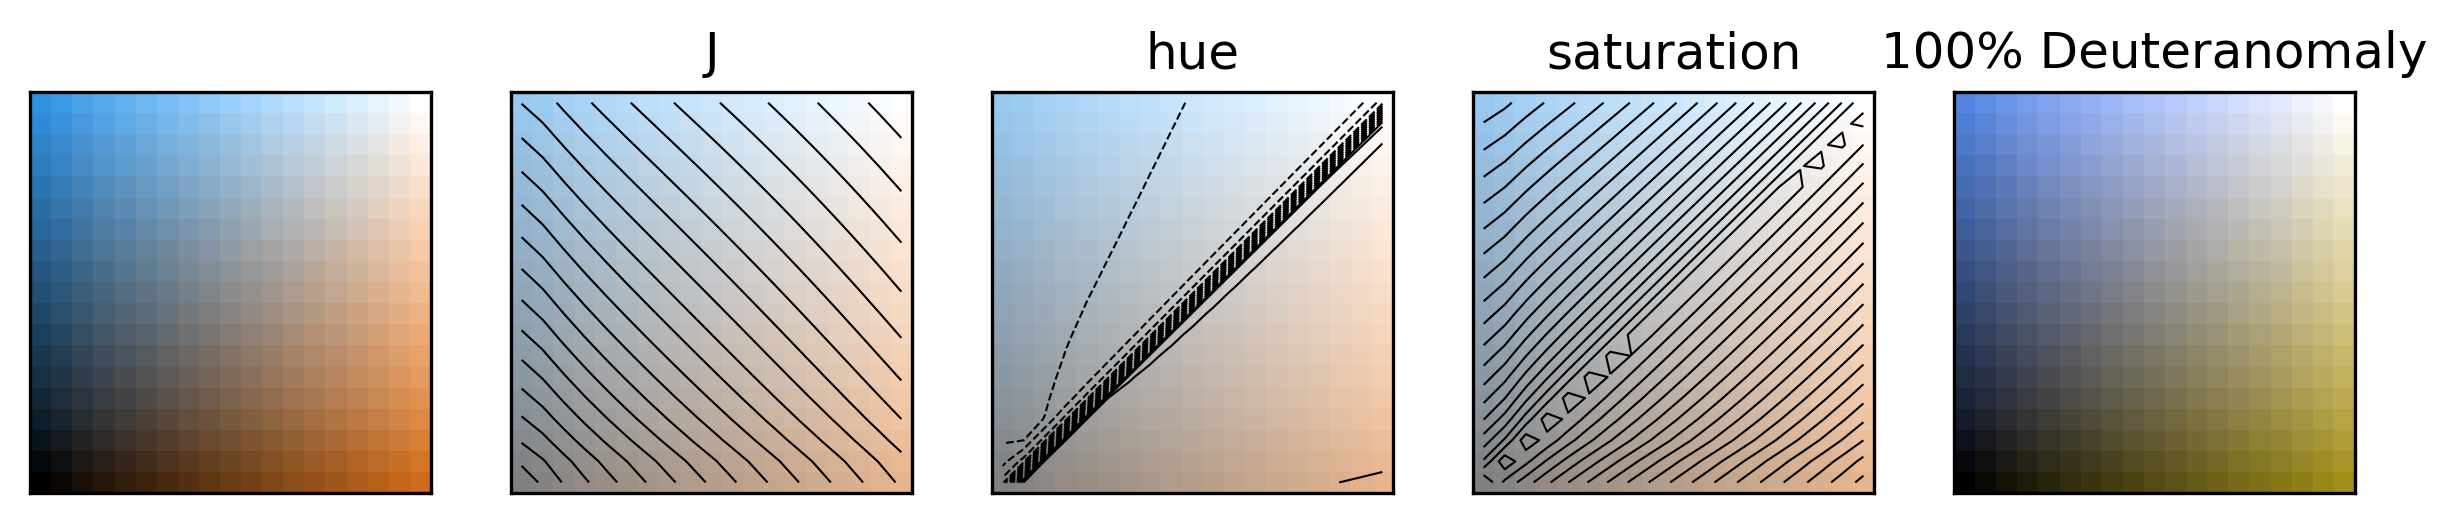

In [4]:
r = 30-180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (2,77.6) # range in lightness 
radius = 37
gamma = 0.9
sat_gamma = 0.7
cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+180, r = radius, gamma = gamma, sat_gamma = sat_gamma )

print(f'max before adjustment: {cmap_1[-1]+ cmap_0[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1# i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2


# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
end_c = cmap_0[-1] + cmap_1[-1]
cmap_0 = cmap_0/end_c[np.newaxis, :]
cmap_1 = cmap_1/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)

# combine to a 2d color matrix
cmap = cmap_0[:,np.newaxis]+ cmap_1[np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

# select cbars
colorbar_dict['2VarAddA0'] = cmap[:,0]
colorbar_dict['2VarAddA1'] = cmap[0,:]

# evaluate
fig, axes = plt.subplots(1,2)

def expand_cmap(cmap):
    cmap_expanded = np.zeros((N, 2*N-1, 3))
    for i in range(2*N-1):
        if i%2 == 0:
            cmap_expanded[:,i] = cmap[i//2][np.newaxis, :]
        else:
            cmap_expanded[:,i] = 0.5*(cmap[i//2][np.newaxis, :]+cmap[1+i//2][np.newaxis, :])
    return cmap_expanded
axes[0].imshow(expand_cmap(cmap_0))
axes[1].imshow(expand_cmap(cmap_1))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [5]:
cmap[0,0]

array([0., 0., 0.])

# Colorbars 2Var_add_b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [1.10064385 1.01806248 0.98598504]
values <0: 0
values >1: 0


array([0., 0., 0.])

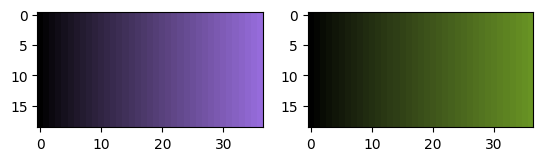

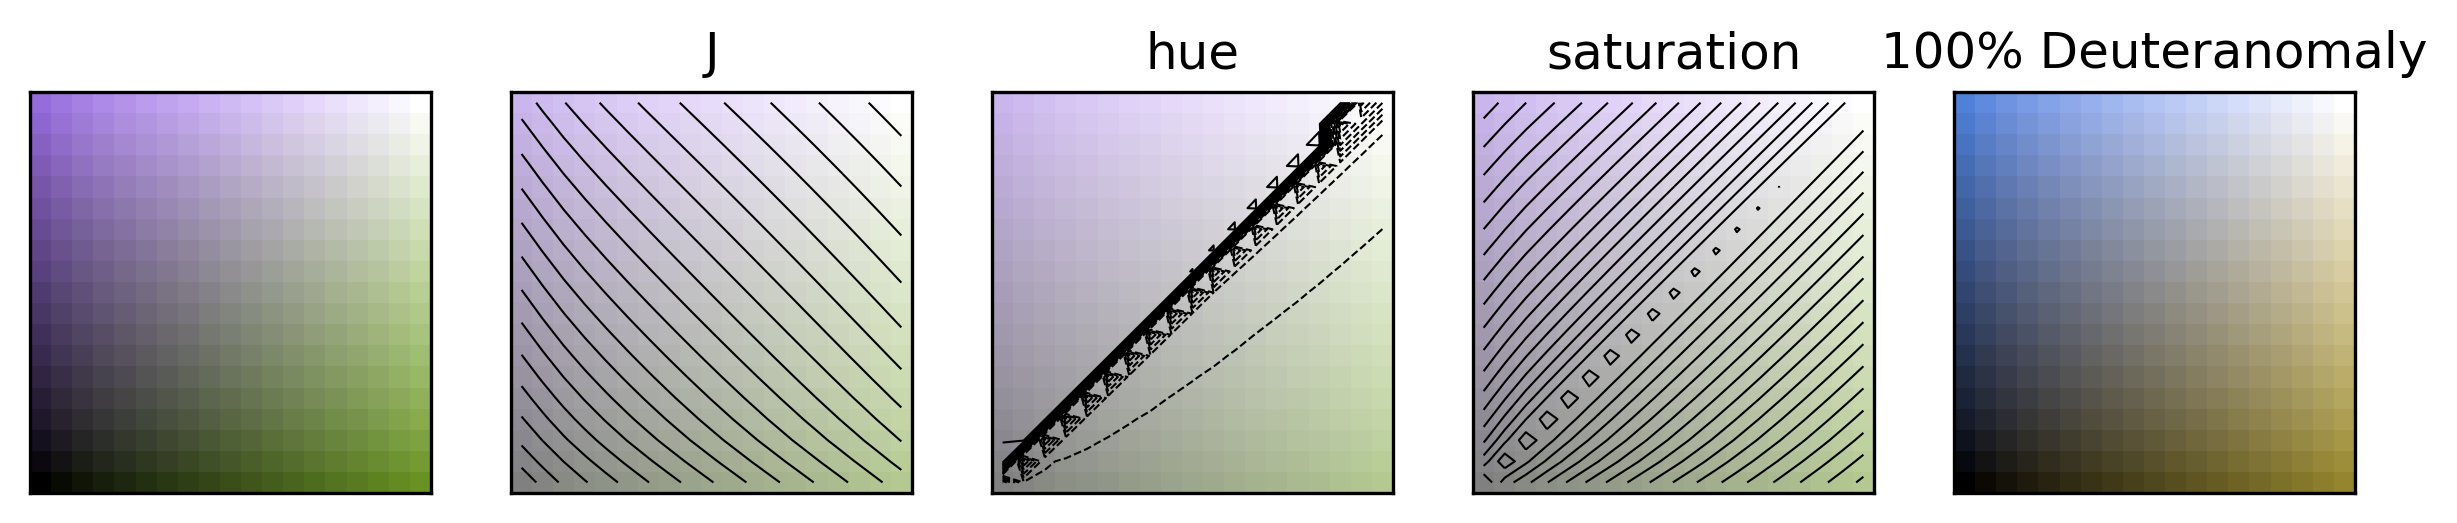

In [6]:
r = -30 + 180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (4, 77.6) # range in lightness 
radius = 37
gamma = 0.9
sat_gamma = 0.7
cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+180, r = radius, gamma = gamma, sat_gamma = sat_gamma )

print(f'max before adjustment: {cmap_1[-1]+ cmap_0[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1# i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2


# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
end_c = cmap_0[-1] + cmap_1[-1]
cmap_0 = cmap_0/end_c[np.newaxis, :]
cmap_1 = cmap_1/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)

# combine to a 2d color matrix
cmap = cmap_0[:,np.newaxis]+ cmap_1[np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

# select cbars
colorbar_dict['2VarAddB0'] = cmap[:,0]
colorbar_dict['2VarAddB1'] = cmap[0,:]

# evaluate
fig, axes = plt.subplots(1,2)

def expand_cmap(cmap):
    cmap_expanded = np.zeros((N, 2*N-1, 3))
    for i in range(2*N-1):
        if i%2 == 0:
            cmap_expanded[:,i] = cmap[i//2][np.newaxis, :]
        else:
            cmap_expanded[:,i] = 0.5*(cmap[i//2][np.newaxis, :]+cmap[1+i//2][np.newaxis, :])
    return cmap_expanded
axes[0].imshow(expand_cmap(cmap_0))
axes[1].imshow(expand_cmap(cmap_1))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error
cmap[0,0]

# The subtractive colorbars are based on a separate colorspace

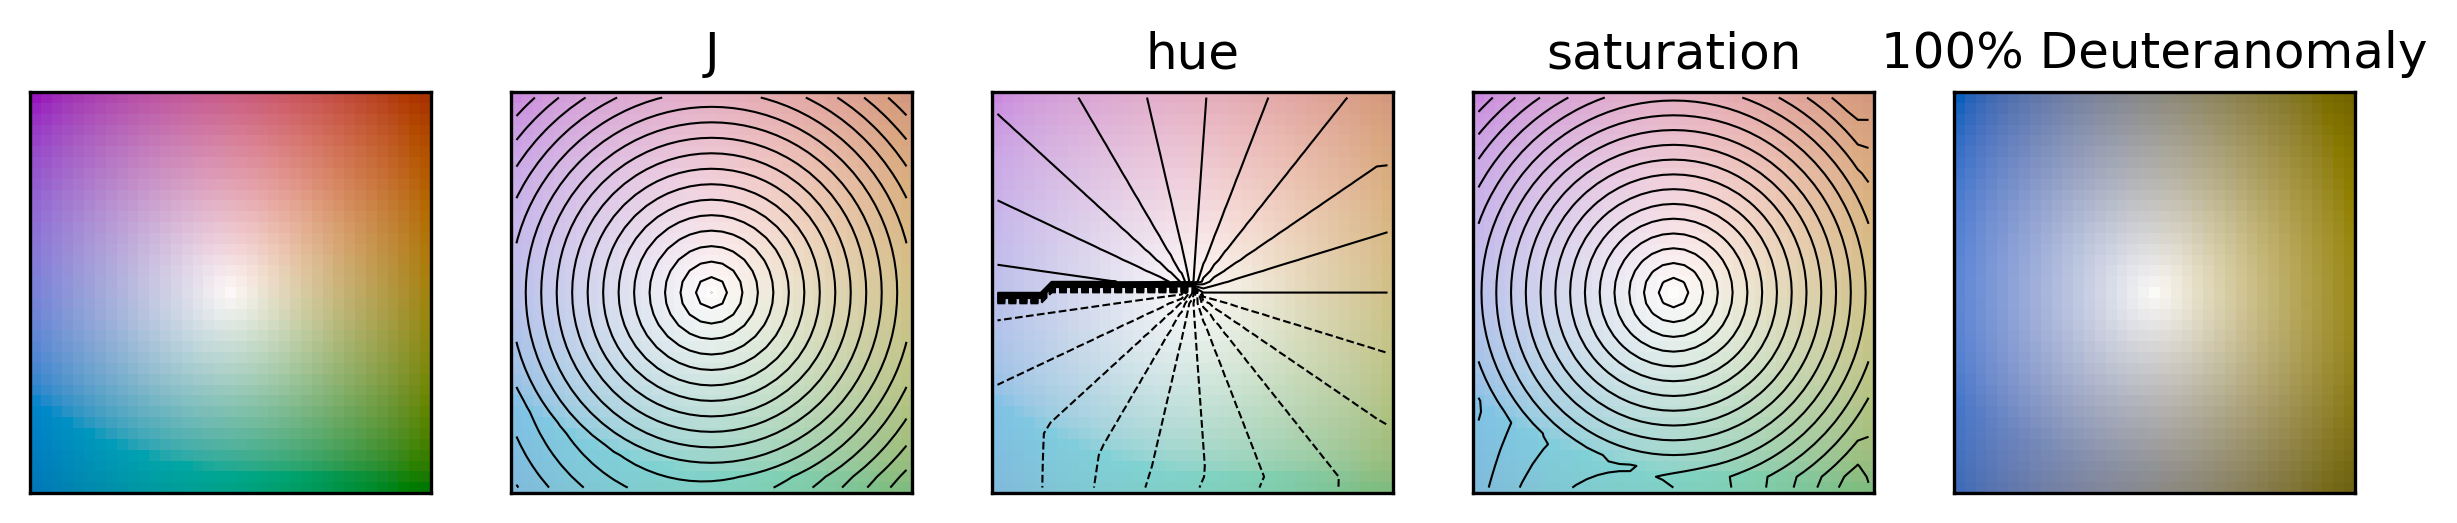

In [7]:
cmap = backend.get_var_J(l = N2, J = (77.6, 128), gamma = 1)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error

# Colorbars 2Var_sub_a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [-0.050715    0.01199211 -0.06975741]
values <0: 0
values >1: 0


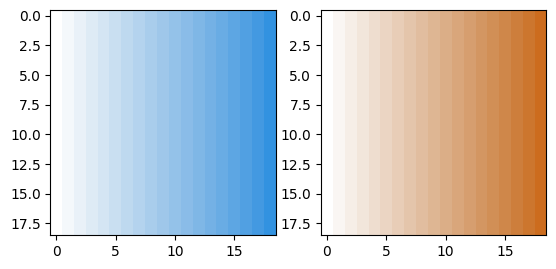

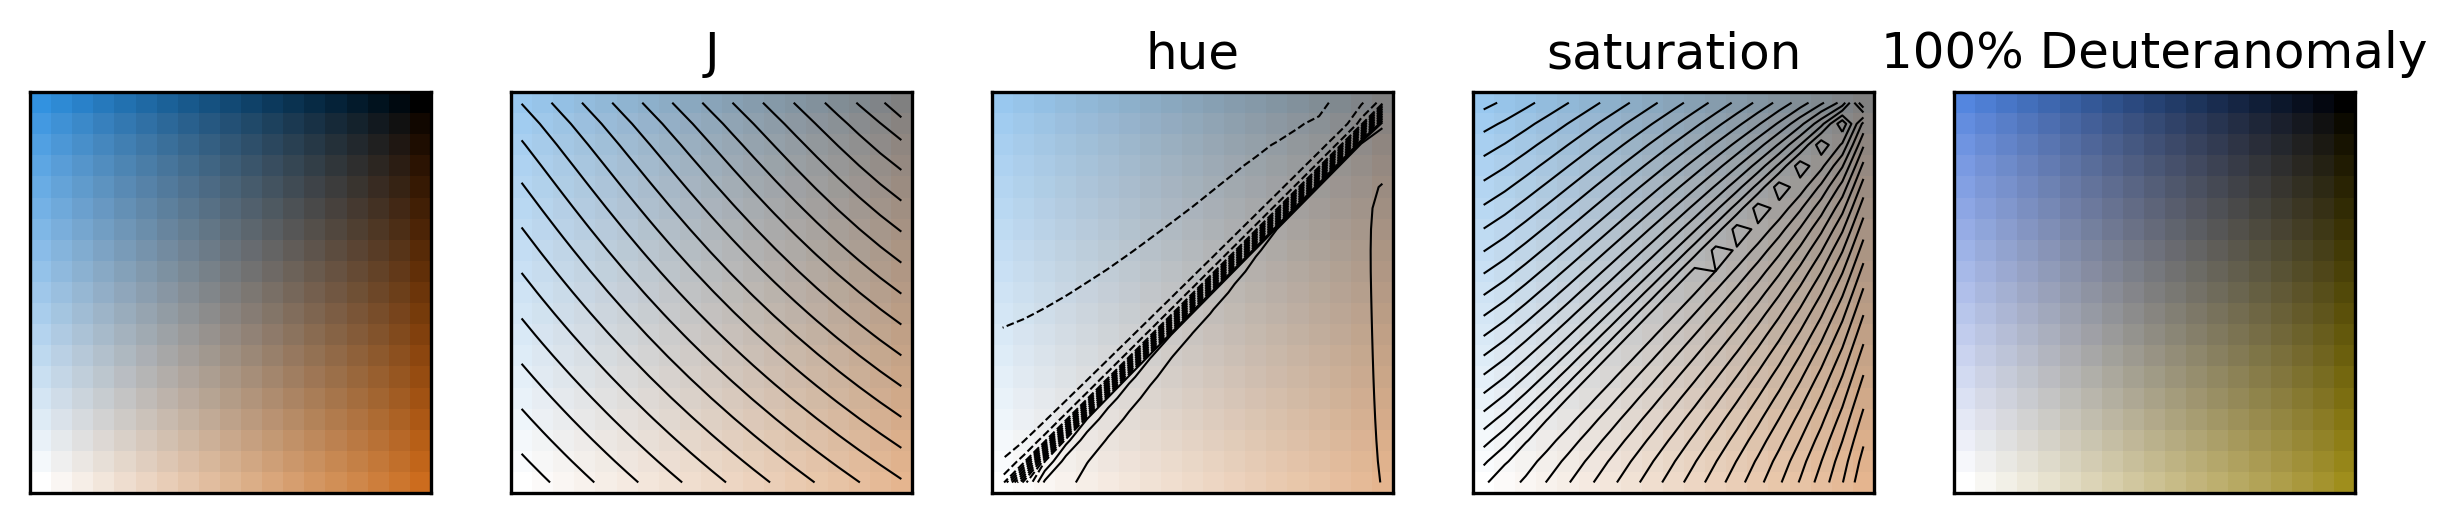

In [8]:
r = 30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 77.6)#(77.6,0.75) # range in lightness  
radius = 37      
gamma = 1  



cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma )
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+180, r = radius, gamma = gamma )

print(f'max before adjustment: {1-(1-cmap_1[-1])-(1-cmap_0[-1])}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1# i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2


# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later
end_c = 1-(1-cmap_0[-1]) - (1-cmap_1[-1])
cmap_0 = cmap_0 - 0.5*end_c[np.newaxis, :]
cmap_1 = cmap_1 - 0.5*end_c[np.newaxis, :]
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis])-(1-cmap_1[np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

# select cbars
colorbar_dict['2VarSubA0'] = cmap[:,0]
colorbar_dict['2VarSubA1'] = cmap[0,:]

# evaluate
fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error 

In [9]:
colorbar_dict['2VarSubA0'][0]

array([1., 1., 1.])

# Colorbars 2Var_sub_b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [ 0.10064385  0.01806248 -0.01401496]
values <0: 5
values >1: 0


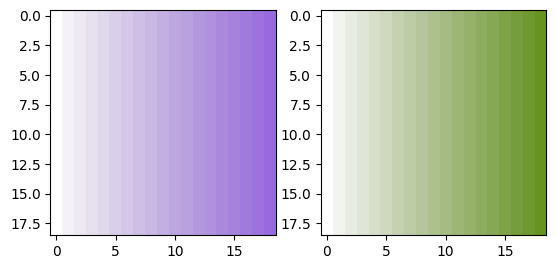

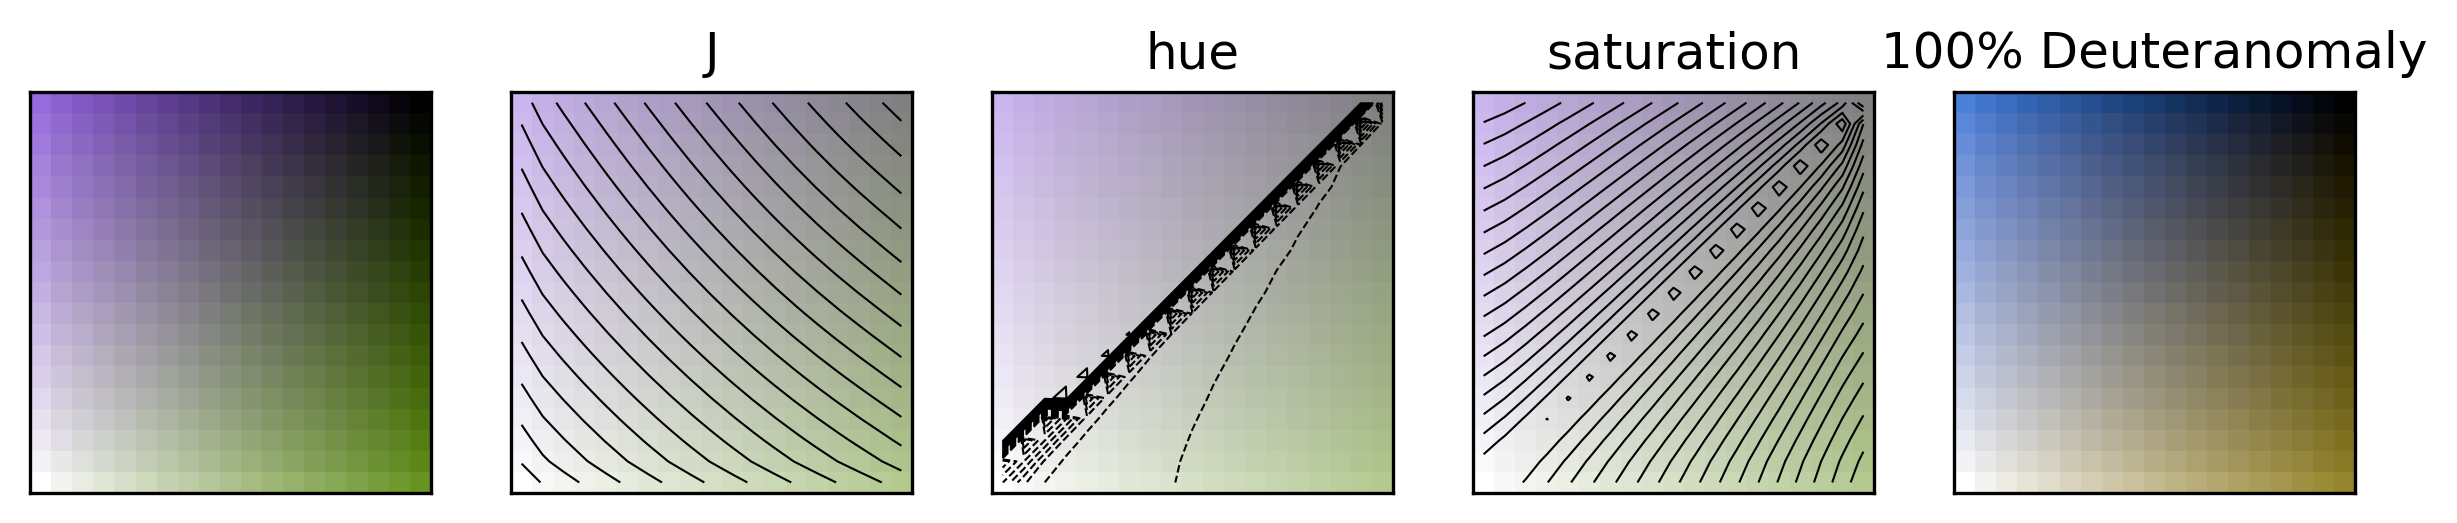

In [10]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 77.6)#(77.6,0.75) # range in lightness  
radius = 37      
gamma = 1  



cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma )
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+180, r = radius, gamma = gamma )

print(f'max before adjustment: {1-(1-cmap_1[-1])-(1-cmap_0[-1])}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1# i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2


# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later
end_c = 1-(1-cmap_0[-1]) - (1-cmap_1[-1])
cmap_0 = cmap_0 - 0.5*end_c[np.newaxis, :]
cmap_1 = cmap_1 - 0.5*end_c[np.newaxis, :]
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis])-(1-cmap_1[np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

# select cbars
colorbar_dict['2VarSubB0'] = cmap[:,0]
colorbar_dict['2VarSubB1'] = cmap[0,:]

# evaluate
fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error 

# resulting colorbars:

In [11]:
colorbar_dict.keys()

dict_keys(['2VarAddA0', '2VarAddA1', '2VarAddB0', '2VarAddB1', '2VarSubA0', '2VarSubA1', '2VarSubB0', '2VarSubB1'])

In [12]:
import pickle

with open(r"2vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)